In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [3]:
df = pd.read_excel('1.1_photoeffect.xlsx')

In [4]:
def chi_sq(x, y, err):
    function = lambda x, a, b: a * x + b
    popt, pcov = curve_fit(function, xdata=x, ydata=y, sigma=err)

    sigma_a = np.sqrt(pcov[0, 0])
    sigma_b = np.sqrt(pcov[1, 1])

    return popt[0], popt[1], sigma_a, sigma_b

In [4]:
df

,color,value,mis,Unnamed: 3,green_voltage,v_s,v_eps,green_current,1978_voltage,1978_current,...,1828_sq,1828_sigma,1778_vol,1778_cur,1778_sq,1778_sigma,1728_vol,1728_cur,1728_sq,1728_sigma
0,yellow,2192.0,1.0,0.000456,3.314,0.001,0.000302,0.6480,-1.924,-0.061,...,0.225832,0.002214,-1.363,-0.050,-0.223607,-0.002236,-0.696,0.066,0.256905,0.001946
1,green,1928.0,1.0,0.000519,3.200,0.001,0.000313,0.6480,-1.965,-0.061,...,0.161245,0.003101,-1.321,-0.050,-0.223607,-0.002236,-0.750,0.029,0.170294,0.002936
2,orange,2326.0,1.0,0.000430,2.640,0.001,0.000379,0.6480,-1.941,-0.060,...,0.109545,0.004564,-1.269,-0.050,-0.223607,-0.002236,-0.782,0.011,0.104881,0.004767
3,red_1,2378.0,1.0,0.000421,2.280,0.001,0.000439,0.6480,-1.934,-0.059,...,0.031623,0.015811,-1.173,-0.048,-0.219089,-0.002282,-0.804,0.000,0.000000,0.001000
4,red_2,2406.0,1.0,0.000416,1.500,0.001,0.000667,0.6480,-1.881,-0.058,...,-0.089443,-0.005590,-1.121,-0.047,-0.216795,-0.002306,-0.824,-0.009,-0.094868,-0.005270
5,red_3,2432.0,1.0,0.000411,1.000,0.001,0.001000,0.6480,-1.700,-0.056,...,-0.118322,-0.004226,-1.092,-0.046,-0.214476,-0.002331,-0.835,-0.013,-0.114018,-0.004385
6,NaN,NaN,NaN,NaN,0.839,0.001,0.001192,0.6460,-1.318,-0.054,...,-0.151658,-0.003297,-1.048,-0.044,-0.209762,-0.002384,-0.860,-0.021,-0.144914,-0.003450
7,NaN,NaN,NaN,NaN,0.779,0.001,0.001284,0.6420,-1.200,-0.053,...,-0.173205,-0.002887,-1.002,-0.042,-0.204939,-0.002440,-0.894,-0.030,-0.173205,-0.002887
8,NaN,NaN,NaN,NaN,0.705,0.001,0.001418,0.6370,-0.977,-0.050,...,-0.187083,-0.002673,-0.974,-0.041,-0.202485,-0.002469,-0.911,-0.033,-0.181659,-0.002752
9,NaN,NaN,NaN,NaN,0.586,0.001,0.001706,0.6300,-0.896,-0.047,...,-0.197484,-0.002532,-0.947,-0.038,-0.194936,-0.002565,-0.931,-0.036,-0.189737,-0.002635


In [5]:
sns.set_theme()

Погрешность каждого измерения напряжение 0.001 В, напряжение, пропорционального току - 0.001 В

Построение градуировочного графика

Text(0, 0.5, '$\\lambda$, $\\AA$')

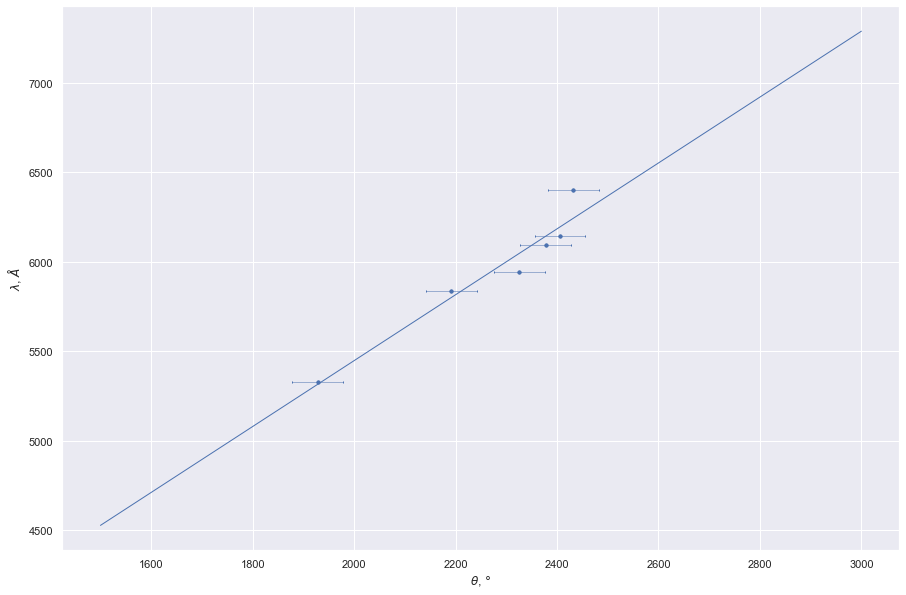

In [6]:
plt.rcParams["figure.figsize"] = (15,10)
theta = np.array(df['value'][0:6])
lmbd = np.array([5835, 5330, 5945, 6096, 6143, 6402])
err = np.ones(6) * 50

x = np.linspace(1500, 3000, 500)
a_,b_,s_,e_ = chi_sq(theta, lmbd, None)
y = a_ * x + b_
plt.plot(x, y, lw = 1)

plt.errorbar(theta, lmbd, xerr = err, yerr= None, fmt='.',color='b',capthick=1,elinewidth=0.5,capsize=1,zorder=10 )
plt.scatter(theta, lmbd, marker = '.', color = 'b' )
plt.xlabel('$\\theta$, $\degree$ ')
plt.ylabel('$\lambda$, $\\AA$')

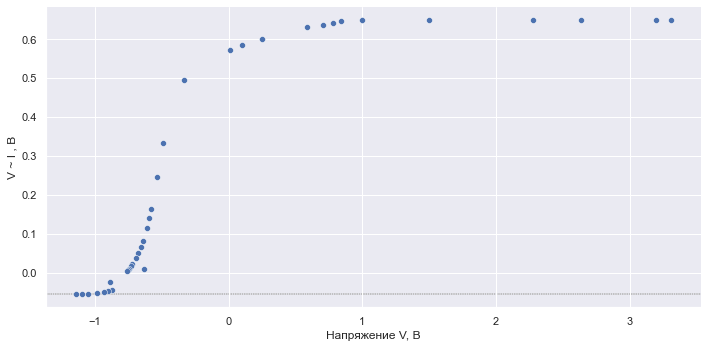

In [7]:
g = sns.relplot(
    data=df,
    x="green_voltage", y="green_current",
    height=5, aspect=2, kind="scatter"
)
(g.map(plt.axhline, y=-0.054, color=".7", dashes=(1, 0.5), zorder=0)
  .set_axis_labels("Напряжение V, В", "V ~ I , В")
  .tight_layout(w_pad=0))

Запирающее напряжение -1 В

C:\Users\Olga\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Olga\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Olga\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'V ~ I, В')

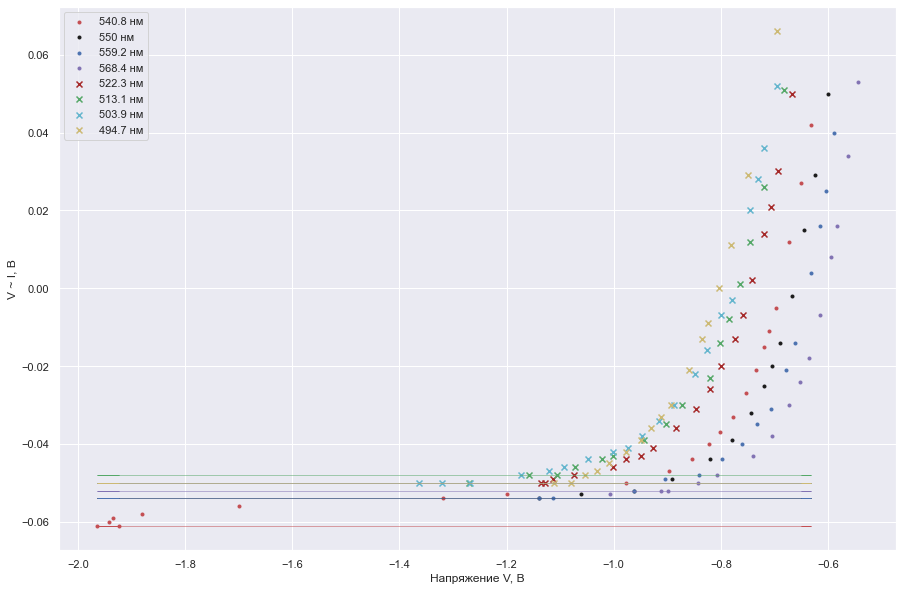

In [8]:
plt.rcParams["figure.figsize"] = (15,10)

plt.scatter(df['1978_voltage'], df['1978_current'], color = 'r', marker = '.', label = '540.8 нм')
y = np.ones(df['1978_voltage'].size) * (-0.061) 
plt.plot(df['1978_voltage'], y, color = 'r', lw = 0.5 )

plt.scatter(df['2028_voltage'], df['2028_current'], color = 'k', marker = '.', label = '550 нм')
y = np.ones(df['1978_voltage'].size) * (-0.054) 
plt.plot(df['1978_voltage'], y, color = 'k', lw = 0.5 )

x = np.sqrt(df['2078_vol'])
plt.scatter(df['2078_vol'], df['2078_cur'] , color = 'b', marker = '.', label = '559.2 нм' )
y = np.ones(df['1978_voltage'].size) * (-0.054) 
plt.plot(df['1978_voltage'], y, color = 'b', lw = 0.5 )

x = np.sqrt(df['2128_vol'])
plt.scatter(df['2128_vol'], df['2128_cur'], color = 'm', marker = '.', label = '568.4 нм')
y = np.ones(df['1978_voltage'].size) * (-0.052) 
plt.plot(df['1978_voltage'], y, color = 'm', lw = 0.5 )

x = np.sqrt(df['1878_vol'])
plt.scatter(df['1878_vol'], df['1878_cur'], color = 'brown', marker = 'x', label = '522.3 нм')
y = np.ones(df['1978_voltage'].size) * (-0.05) 
plt.plot(df['1978_voltage'], y, color = 'brown', lw = 0.5 )

plt.scatter(df['1828_vol'], df['1828_cur'], color = 'g', marker = 'x', label = '513.1 нм')
y = np.ones(df['1978_voltage'].size) * (-0.048) 
plt.plot(df['1978_voltage'], y, color = 'g', lw = 0.5 )

plt.scatter(df['1778_vol'], df['1778_cur'], color = 'c', marker = 'x', label ='503.9 нм')
y = np.ones(df['1978_voltage'].size) * (-0.05) 
plt.plot(df['1978_voltage'], y, color = 'c', lw = 0.5 )

plt.scatter(df['1728_vol'], df['1728_cur'], color = 'y', marker = 'x', label = '494.7 нм')
y = np.ones(df['1978_voltage'].size) * (-0.05) 
plt.plot(df['1978_voltage'], y, color = 'y', lw = 0.5 )

plt.xlabel('Напряжение V, В')
plt.legend()
plt.ylabel('V ~ I, В')
#5408.02501454, 5500.0776877 , 5592.13036085, 5684.18303401,
    #   5223.91966824, 5131.86699508, 5039.81432193, 4947.76164877

Text(0, 0.5, 'I$^{1/2}$ A')

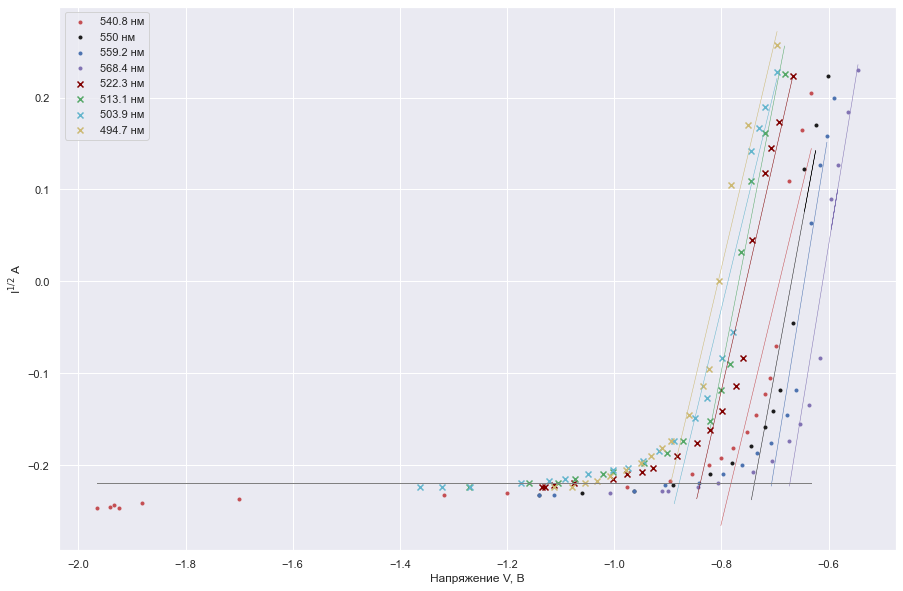

In [9]:
plt.rcParams["figure.figsize"] = (15,10)
v_0 = []
v_0_mis = []

plt.scatter(df['1978_voltage'], df['1978_sq'], color = 'r', marker = '.', label = '540.8 нм')
a, b, s, e = chi_sq(df['1978_voltage'][12:21],df['1978_sq'][12:21], None) #df['1978_sigma'][12:21])
x = np.array(df['1978_voltage'][12:21])
y = a * x + b
plt.plot(x, y, color = 'r', lw = 0.5)
v = (-0.2191 - b)/a
v_mis = v * np.sqrt((0.001/(-0.2191))**2 + (s/a)**2 + (e/b)**2)
v_0.append(v)
v_0_mis.append(v_mis)

plt.scatter(df['2028_voltage'], df['2028_sq'], color = 'k', marker = '.', label = '550 нм')
a, b, s, e = chi_sq(df['2028_voltage'][1:8],df['2028_sq'][1:8], None)#df['2028_sigma'][1:8])
x = np.array(df['2028_voltage'][1:8])
y = a * x + b
plt.plot(x, y, color = 'k', lw = 0.5)
v = (-0.2191 - b)/a
v_mis = v * np.sqrt((0.001/(-0.2191))**2 + (s/a)**2 + (e/b)**2)
v_0.append(v)
v_0_mis.append(v_mis)

plt.scatter(df['2078_vol'], df['2078_sq'], color = 'b', marker = '.', label = '559.2 нм')
a, b, s, e = chi_sq(df['2078_vol'][8:14],df['2078_sq'][8:14],None)# df['2078_sigma'][8:14])
x = np.array(df['2078_vol'][8:14])
y = a * x + b
plt.plot(x, y, color = 'b', lw = 0.5)
v = (-0.2191 - b)/a
v_mis = v * np.sqrt((0.001/(-0.2191))**2 + (s/a)**2 + (e/b)**2)
v_0.append(v)
v_0_mis.append(v_mis)

plt.scatter(df['2128_vol'], df['2128_sq'], color = 'm', marker = '.', label = '568.4 нм')
a, b, s, e = chi_sq(df['2128_vol'][0:8],df['2128_sq'][0:8], None)#df['2128_sigma'][0:8])
x = np.array(df['2128_vol'][0:8])
y = a * x + b
plt.plot(x, y, color = 'm', lw = 0.5)
v = (-0.2191 - b)/a
v_mis = v * np.sqrt((0.001/(-0.2191))**2 + (s/a)**2 + (e/b)**2)
v_0.append(v)
v_0_mis.append(v_mis)

plt.scatter(df['1878_vol'], df['1878_sq'], color = 'maroon', marker = 'x', label = '522.3 нм')
a, b, s, e = chi_sq(df['1878_vol'][9:19],df['1878_sq'][9:19],None)# df['1878_sigma'][9:19])
x = np.array(df['1878_vol'][9:19])
y = a * x + b
plt.plot(x, y, color = 'maroon', lw = 0.5)
v = (-0.2191 - b)/a
v_mis = v * np.sqrt((0.001/(-0.2191))**2 + (s/a)**2 + (e/b)**2)
v_0.append(v)
v_0_mis.append(v_mis)

plt.scatter(df['1828_vol'], df['1828_sq'], color = 'g', marker = 'x', label = '513.1 нм')
a, b, s, e = chi_sq(df['1828_vol'][0:7],df['1828_sq'][0:7], None)#df['1828_sigma'][0:7])
x = np.array(df['1828_vol'][0:7])
y = a * x + b
plt.plot(x, y, color = 'g', lw = 0.5)
v = (-0.2191 - b)/a
v_mis = v * np.sqrt((0.001/(-0.2191))**2 + (s/a)**2 + (e/b)**2)
v_0.append(v)
v_0_mis.append(v_mis)

plt.scatter(df['1778_vol'], df['1778_sq'], color = 'c', marker = 'x', label = '503.9 нм')
a, b, s, e = chi_sq(df['1778_vol'][11:20],df['1778_sq'][11:20],None)# df['1778_sigma'][11:20])
x = np.array(df['1778_vol'][11:20])
y = a * x + b
plt.plot(x, y, color = 'c', lw = 0.5)
v = (-0.2191 - b)/a
v_mis = v * np.sqrt((0.001/(-0.2191))**2 + (s/a)**2 + (e/b)**2)
v_0.append(v)
v_0_mis.append(v_mis)

plt.scatter(df['1728_vol'], df['1728_sq'], color = 'y', marker = 'x', label = '494.7 нм')
a, b, s, e = chi_sq(df['1728_vol'][0:8],df['1728_sq'][0:8], None)#df['1728_sigma'][0:8])
x = np.array(df['1728_vol'][0:8])
y = a * x + b
plt.plot(x, y, color = 'y', lw = 0.5)
v = (-0.2191 - b)/a
v_mis = v * np.sqrt((0.001/(-0.2191))**2 + (s/a)**2 + (e/b)**2)
v_0.append(v)
v_0_mis.append(v_mis)

y = np.ones(df['1978_voltage'].size) * (-0.219089023)
plt.plot(df['1978_voltage'], y, color = 'grey', lw = 1)
plt.xlabel('Напряжение V, В')
plt.legend()
plt.ylabel('I$^{1/2}$ A')


In [10]:
v_0

[-0.7818520473685202,
 -0.7381571919001547,
 -0.7060016300506716,
 -0.6719909052592061,
 -0.8392093363575084,
 -0.8405979915879467,
 -0.8785483010639872,
 -0.894427260282262]

In [11]:
v_0_mis

[-0.19100550782887135,
 -0.1622137042767762,
 -0.1334415392392529,
 -0.09688611786651209,
 -0.11755322858382483,
 -0.10978029068835234,
 -0.14149834184311413,
 -0.1242522203155482]

Построение зависимости запирающего напряжения от частоты света

In [19]:
c = 3 * 10 ** 8 #скорость света в нм
th = np.array([1978, 2028, 2078, 2128, 1878, 1828, 1778, 1728])
th_err = np.ones(th.size) * 10
lmbds = (a_*th + b_) * 10 **(-10) 
omegas = 2 * 3.14 * c / lmbds
omegas_err = omegas * np.sqrt((s_/a_)**2 + (e_/b_)**2 + (th_err/th)**2)

In [20]:
lmbds

array([5.40802501e-07, 5.50007769e-07, 5.59213036e-07, 5.68418303e-07,
       5.22391967e-07, 5.13186700e-07, 5.03981432e-07, 4.94776165e-07])

Text(0, 0.5, 'V$_{0}$, В')

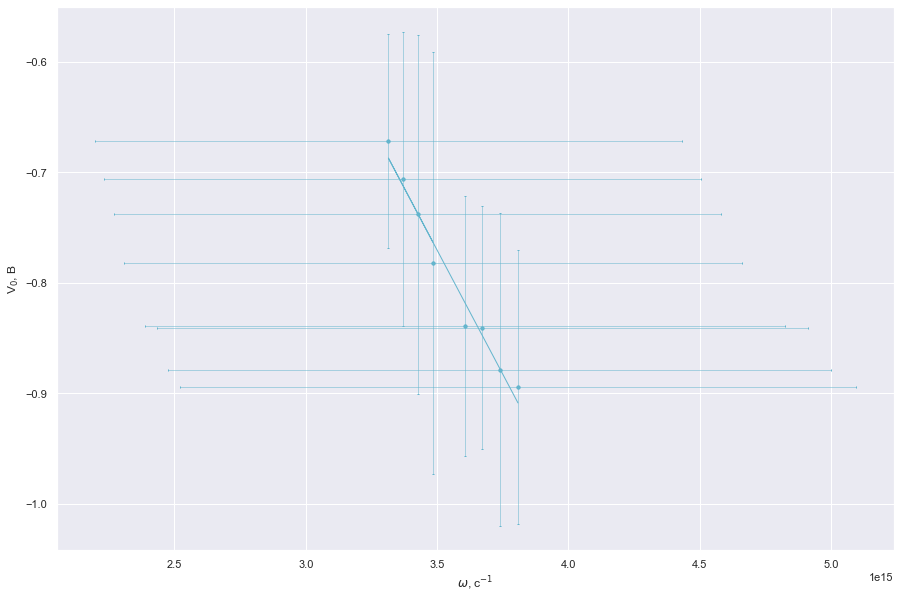

In [21]:
n,m,p,q = chi_sq(omegas, v_0, None)
y = n * omegas + m
plt.plot(omegas, y, lw = 1, color = 'c')
plt.scatter(omegas, v_0, marker = '.', color = 'c')
plt.errorbar(omegas, v_0, xerr = omegas_err, yerr= v_0_mis, fmt='.',color='c',capthick=1,elinewidth=0.5,capsize=1,zorder=10 )
plt.xlabel('$\\omega$, c$^{-1}$')
plt.ylabel('V$_{0}$, В')

In [22]:
n #dv/d_omega

-4.495121622781855e-16

In [23]:
plank = abs(n * 1.6 * 10 **(-19))

In [24]:
plank #Дж с

7.192194596450968e-35

In [ ]:
h = 1.5 * 10**(-34)

In [160]:
(plank - h)/h #ошибка

4793.796414864076

In [161]:
p #погрешность

3.083774984397771e-13

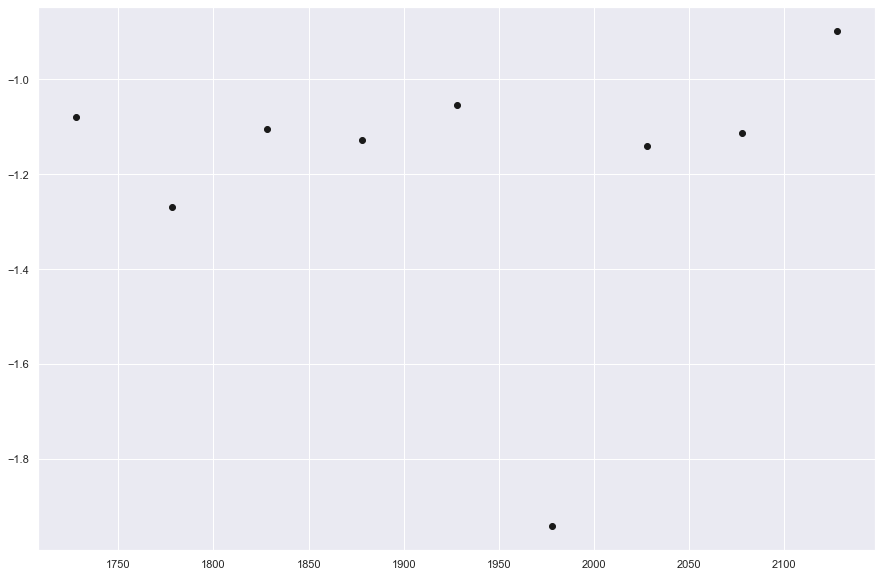

In [78]:
block_vol = np.array([-1.055, -1.941, -1.14, -1.113, -0.899, -1.129, -1.105, -1.269, -1.079])
omegas = np.array([1928, 1978, 2028, 2078, 2128, 1878, 1828, 1778, 1728])
plt.scatter(omegas, block_vol, color = 'k')